# Projek Mandiri (Self Project)
## Mohammad Mumtaz Sakho
## Email : mumtazsakho@apps.ipb.ac.id / mmumtazsakho@gmail.com 

# Deskripsi dataset

Data didapatkan dari twitter pada selang 07-14 Oktober 2021 menggunakan teknik crawling dengan kata kunci 'vaksin'. Data yang diambil hanya berupa teks yang masih kotor, kemudian data diberi label (P/N) secara manual menggunakan Excel. Data Berisi 1523 baris yang sedikit dimodifikasi.

*The data was obtained from twitter between 07-14 October 2021 using a crawling technique with the keyword 'vaccine'. The data taken is only dirty text, then the data is labeled (P/N) manually using Excel. Data Contains 1523 slightly modified rows.*

# Tujuan Projek
Membuat algoritma Machine Learning dengan menggunakan dua model, yaitu Neural Network dan Support Vector Machine (SVM).

*Creating Machine Learning algorithms using two models, namely Neural Network and Support Vector Machine (SVM).*

# Manfaat
- Dapat menganalisis sentiment masyarakat mengenai vaksin covid-19 di masa depan
- Dapat melihat perkembangan pemahaman masyarakat terhadap vaksin covid-19

- *Can be analyze people's sentiments about the Covid-19 vaccine in the future.*
- *Can be see the growth of public understanding of the covid-19 vaccine.*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_excel(r'Downloads\1500_sample_kotor - Copy.xlsx')
data.head()

,Unnamed: 0,tweet_tet,sentiment
0,NaN,b'Vaksin GRATIS ini diberikan oleh Indonesia u...,P
1,NaN,b'@fluffywolfjake jangann lupa sarapann sblm v...,P
2,NaN,b'@CNNIndonesia Biar bisnis vaksin sukses trs',N
3,NaN,b'Ayo kaka jgn lupa dan terlena Pandemi Covid-...,P
4,NaN,"b'mari vaksin agar selamatkan diri, keluarga, ...",P


In [ ]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
data.rename(columns={'tweet_tet':'text'},inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1523 non-null   object
 1   sentiment  1523 non-null   object
dtypes: object(2)
memory usage: 23.9+ KB


In [ ]:
data.head()

,text,sentiment
0,b'Vaksin GRATIS ini diberikan oleh Indonesia u...,P
1,b'@fluffywolfjake jangann lupa sarapann sblm v...,P
2,b'@CNNIndonesia Biar bisnis vaksin sukses trs',N
3,b'Ayo kaka jgn lupa dan terlena Pandemi Covid-...,P
4,"b'mari vaksin agar selamatkan diri, keluarga, ...",P


In [ ]:
data['sentiment'].value_counts()

P    1112
N     411
Name: sentiment, dtype: int64

In [ ]:
data.drop_duplicates(subset='text',inplace=True)

In [ ]:
data['sentiment'].value_counts()

P    1112
N     411
Name: sentiment, dtype: int64

# Data Cleansing

In [ ]:
import re
from string import punctuation

In [ ]:
def processTweet(tweet):
    tweet = re.sub(r'\&\w*;', '', tweet)
    tweet = re.sub('@[^\s]+','',tweet)
    tweet = re.sub(r'\$\w*', '', tweet)
    tweet = tweet.lower()
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    tweet = re.sub(r'#\w*', '', tweet)
    tweet = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', tweet)
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    tweet = tweet.lstrip(' ') 
    tweet = ''.join(c for c in tweet if c <= '\uFFFF') 
    return tweet

In [ ]:
data['clean_text'] = data['text'].apply(processTweet)
data['clean_text'].head()

0    vaksin gratis ini diberikan oleh indonesia unt...
1                   jangann lupa sarapann sblm vaksin 
2                       biar bisnis vaksin sukses trs 
3    ayo kaka jgn lupa dan terlena pandemi covid ma...
4    mari vaksin agar selamatkan diri keluarga dan ...
Name: clean_text, dtype: object

In [ ]:
data.head()

,text,sentiment,clean_text
0,b'Vaksin GRATIS ini diberikan oleh Indonesia u...,P,vaksin gratis ini diberikan oleh indonesia unt...
1,b'@fluffywolfjake jangann lupa sarapann sblm v...,P,jangann lupa sarapann sblm vaksin
2,b'@CNNIndonesia Biar bisnis vaksin sukses trs',N,biar bisnis vaksin sukses trs
3,b'Ayo kaka jgn lupa dan terlena Pandemi Covid-...,P,ayo kaka jgn lupa dan terlena pandemi covid ma...
4,"b'mari vaksin agar selamatkan diri, keluarga, ...",P,mari vaksin agar selamatkan diri keluarga dan ...


In [ ]:
df = data[['clean_text','sentiment']]
df

,clean_text,sentiment
0,vaksin gratis ini diberikan oleh indonesia unt...,P
1,jangann lupa sarapann sblm vaksin,P
2,biar bisnis vaksin sukses trs,N
3,ayo kaka jgn lupa dan terlena pandemi covid ma...,P
4,mari vaksin agar selamatkan diri keluarga dan ...,P
...,...,...
1518,vaksin itu penting,P
1519,pentingnya vaksin,P
1520,inisiatif vaksin,P
1521,masi ada aja orang yang malas vaksin,P


In [ ]:
pos = df[df['sentiment']=='P']
pos = pos.reset_index(drop=True)
pos = pos.iloc[0:411]
pos

,clean_text,sentiment
0,vaksin gratis ini diberikan oleh indonesia unt...,P
1,jangann lupa sarapann sblm vaksin,P
2,ayo kaka jgn lupa dan terlena pandemi covid ma...,P
3,mari vaksin agar selamatkan diri keluarga dan ...,P
4,persiapan yang mesti dilakuin kalau mau road t...,P
...,...,...
406,abis vaksin pagi blm tdr samsek sampe skrg kua...,P
407,emang nyari vaksin dosis post dkkp cilacap pas...,P
408,info vaksin rsud kartini kabupaten jepara,P
409,tolong booster berbayar percepat dong banyak i...,P


In [ ]:
neg = df[df['sentiment']=='N']
neg = neg.reset_index(drop=True)
neg

,clean_text,sentiment
0,biar bisnis vaksin sukses trs,N
1,ternyata banyak orang yang mengalah dan terpak...,N
2,vaksin pas vaksin gak sakit pas after effectny...,N
3,gaada adab anjing vaksin gabisa ngantri amit o...,N
4,vaksin pertama lengan pegel bgtt,N
...,...,...
406,vaksin itu mengerikan bahaya haram,N
407,wkwkwkwk vaksin lbh hebat tuhan,N
408,apa gunanya vaksin kalo gitu mending gausah ga...,N
409,strategi marketing vaksin biar laku,N


# Visualiztion

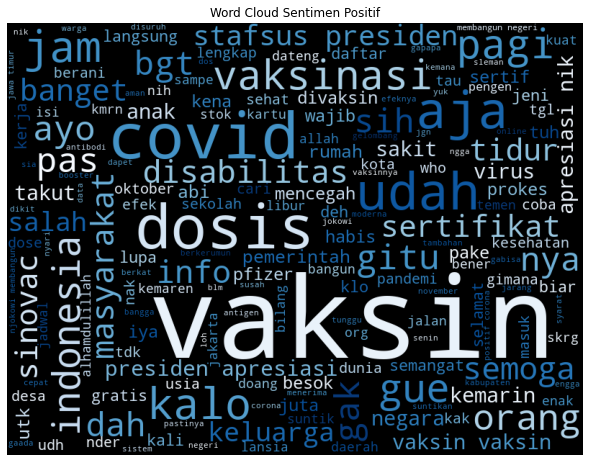

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
 
comment_words_positive = ''
stopwords = set(stopwords.words('indonesian'))

for val in pos.clean_text:
    val = str(val)
    val = val.replace("'", "").replace(',','').replace(']','').replace('[','')
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words_positive += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Blues',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words_positive)

                 
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Word Cloud Sentimen Positif')
 
plt.show()

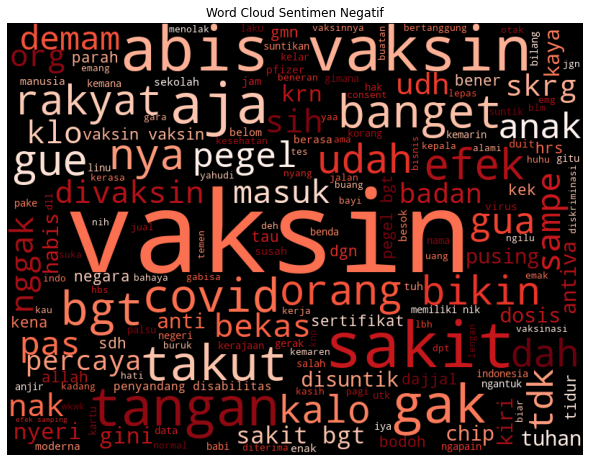

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

comment_words_negative = ''
stopwords = set(stopwords.words('indonesian'))

for val in neg.clean_text:
    val = str(val)
    val = val.replace("'", "").replace(',','').replace(']','').replace('[','')
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words_negative += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Reds',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words_negative)

                     
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Word Cloud Sentimen Negatif')
 
plt.show()

In [ ]:
uji = pd.concat([pos,neg],ignore_index=True)
uji

,clean_text,sentiment
0,vaksin gratis ini diberikan oleh indonesia unt...,P
1,jangann lupa sarapann sblm vaksin,P
2,ayo kaka jgn lupa dan terlena pandemi covid ma...,P
3,mari vaksin agar selamatkan diri keluarga dan ...,P
4,persiapan yang mesti dilakuin kalau mau road t...,P
...,...,...
817,vaksin itu mengerikan bahaya haram,N
818,wkwkwkwk vaksin lbh hebat tuhan,N
819,apa gunanya vaksin kalo gitu mending gausah ga...,N
820,strategi marketing vaksin biar laku,N


### One Hot Encoding 

In [ ]:
label = pd.get_dummies(uji.sentiment)
df_baru = pd.concat([uji, label], axis=1)
df_baru = df_baru.drop(columns='sentiment')
df_baru

,clean_text,N,P
0,vaksin gratis ini diberikan oleh indonesia unt...,0,1
1,jangann lupa sarapann sblm vaksin,0,1
2,ayo kaka jgn lupa dan terlena pandemi covid ma...,0,1
3,mari vaksin agar selamatkan diri keluarga dan ...,0,1
4,persiapan yang mesti dilakuin kalau mau road t...,0,1
...,...,...,...
817,vaksin itu mengerikan bahaya haram,1,0
818,wkwkwkwk vaksin lbh hebat tuhan,1,0
819,apa gunanya vaksin kalo gitu mending gausah ga...,1,0
820,strategi marketing vaksin biar laku,1,0


## Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_baru['clean_text'], df_baru[['N','P']], test_size=0.2 , random_state = 123)

## Tokenizing

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(x_train) 
tokenizer.fit_on_texts(x_test)
 
sekuens_latih = tokenizer.texts_to_sequences(x_train)
sekuens_test = tokenizer.texts_to_sequences(x_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

# Modeling

## Neural Network

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>=0.8):
            print('\nAkurasi validasi sudah mencapai >80%')
            self.model.stop_training = True
            
callbacks = myCallback()

In [ ]:
num_epochs = 100
history = model.fit(padded_latih, y_train, epochs=num_epochs, 
                    validation_data=(padded_test, y_test), verbose=2, callbacks=[callbacks])

Epoch 1/100
21/21 - 5s - loss: 0.6933 - accuracy: 0.5068 - val_loss: 0.6918 - val_accuracy: 0.5030
Epoch 2/100
21/21 - 1s - loss: 0.6833 - accuracy: 0.6058 - val_loss: 0.6641 - val_accuracy: 0.6727
Epoch 3/100
21/21 - 1s - loss: 0.5363 - accuracy: 0.7915 - val_loss: 0.4634 - val_accuracy: 0.8121

Akurasi validasi sudah mencapai >80%


In [ ]:
y_pred = model.predict(padded_test)
y_pred

array([[0.49037492, 0.510705  ],
       [0.50680643, 0.49862722],
       [0.10824555, 0.850076  ],
       [0.5546218 , 0.45856333],
       [0.2178756 , 0.7394759 ],
       [0.6550205 , 0.36437488],
       [0.65679973, 0.36351436],
       [0.36563385, 0.6085801 ],
       [0.14600849, 0.81066126],
       [0.288781  , 0.68146384],
       [0.60440177, 0.4187286 ],
       [0.39226702, 0.59093386],
       [0.67337227, 0.347391  ],
       [0.5890761 , 0.4294212 ],
       [0.47606474, 0.52113265],
       [0.6649963 , 0.3541499 ],
       [0.37117296, 0.6110079 ],
       [0.19107062, 0.7677313 ],
       [0.5398206 , 0.4726081 ],
       [0.674477  , 0.34604204],
       [0.65614647, 0.36454806],
       [0.47332332, 0.5241976 ],
       [0.3202673 , 0.652841  ],
       [0.3162623 , 0.6569823 ],
       [0.5576271 , 0.46081507],
       [0.5651406 , 0.44675255],
       [0.67132056, 0.3499134 ],
       [0.35474873, 0.62476695],
       [0.37188193, 0.60664386],
       [0.1649282 , 0.79113245],
       [0.

In [ ]:
for i in range(len(x_test)):
    for j in range(1):
        if y_pred[i][j]>y_pred[i][j+1]:
            y_pred[i][j]=1
            y_pred[i][j+1]=0
        else:
            y_pred[i][j]=0
            y_pred[i][j+1]=1

In [ ]:
y_pred

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [ ]:
df_pred = pd.DataFrame(data=y_pred)
df_pred.rename(columns={0:'N',1:'P'},inplace=True)
df_pred.N = df_pred.N.astype(int)
df_pred.P = df_pred.P.astype(int)
df_pred

,N,P
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
160,0,1
161,1,0
162,1,0
163,0,1


In [ ]:
# misal positive = 1, negatif = 0
list_value = []
for i in range(len(x_test)):
    for j in range(1):
        if y_pred[i][j]>y_pred[i][j+1]:
            list_value.append(0)
        else:
            list_value.append(1)

In [ ]:
pred = pd.DataFrame(data=list_value)
pred.rename(columns={0:'sentiment_predict'},inplace=True)

In [ ]:
pred.head()

,sentiment_predict
0,1
1,0
2,1
3,0
4,1


In [ ]:
list_value2 = []
for i in range(len(x_test)):
    for j in range(1):
        if y_test.values[i][j]>y_test.values[i][j+1]:
            list_value2.append(0)
        else:
            list_value2.append(1)

In [ ]:
y_testing = pd.DataFrame(data=list_value2)
y_testing.rename(columns={0:'sentiment_testing'},inplace=True)

In [ ]:
y_testing

,sentiment_testing
0,1
1,1
2,1
3,0
4,1
...,...
160,1
161,0
162,0
163,0


In [ ]:
banding = pd.concat([y_testing,pred],axis=1)
banding

,sentiment_testing,sentiment_predict
0,1,1
1,1,0
2,1,1
3,0,0
4,1,1
...,...,...
160,1,1
161,0,0
162,0,0
163,0,1


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
import warnings
warnings.filterwarnings('ignore')

print(classification_report(banding['sentiment_testing'], banding['sentiment_predict']))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82        84
           1       0.81      0.80      0.81        81

    accuracy                           0.81       165
   macro avg       0.81      0.81      0.81       165
weighted avg       0.81      0.81      0.81       165



In [ ]:
import seaborn as sns

Text(0.5, 15.0, 'Prediction')

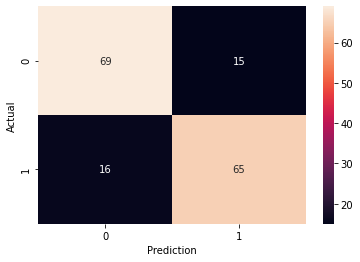

In [ ]:
sns.heatmap(confusion_matrix(banding['sentiment_testing'], banding['sentiment_predict']), annot=True)
plt.ylabel('Actual')
plt.xlabel('Prediction')

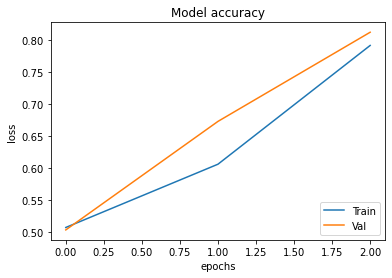

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc='lower right')
plt.show()

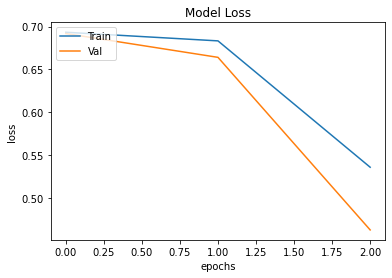

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc='upper left')
plt.show()

## Support Vector Machine (SVM)

In [ ]:
from sklearn import svm
from sklearn.svm import SVC

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
def label(nilai):
    if nilai=='P':
        return 1
    else:
        return 0

In [ ]:
uji['sentiment'] = uji['sentiment'].apply(label)
uji

,clean_text,sentiment
0,vaksin gratis ini diberikan oleh indonesia unt...,1
1,jangann lupa sarapann sblm vaksin,1
2,ayo kaka jgn lupa dan terlena pandemi covid ma...,1
3,mari vaksin agar selamatkan diri keluarga dan ...,1
4,persiapan yang mesti dilakuin kalau mau road t...,1
...,...,...
817,vaksin itu mengerikan bahaya haram,0
818,wkwkwkwk vaksin lbh hebat tuhan,0
819,apa gunanya vaksin kalo gitu mending gausah ga...,0
820,strategi marketing vaksin biar laku,0


In [ ]:
x = uji['clean_text']
y = uji['sentiment']

In [ ]:
vectorizer = TfidfVectorizer()
vektorisasi_trainx = vectorizer.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(vektorisasi_trainx, y, test_size=0.2 , random_state = 123)

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid_s = GridSearchCV(SVC(), cv=10, param_grid=param_grid)
grid_s.fit(x_train, y_train)
svm_s = grid_s.best_estimator_

In [ ]:
print(grid_s.best_params_)
 
print(grid_s.best_estimator_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)


In [ ]:
grid_pred_svm = svm_s.predict(x_test)

In [ ]:
print(classification_report(y_test, grid_pred_svm))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        84
           1       0.80      0.83      0.81        81

    accuracy                           0.81       165
   macro avg       0.81      0.81      0.81       165
weighted avg       0.81      0.81      0.81       165



Text(0.5, 15.0, 'Prediction')

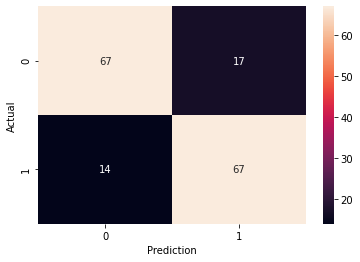

In [ ]:
sns.heatmap(confusion_matrix(y_test, grid_pred_svm), annot=True, fmt='g')
plt.ylabel('Actual')
plt.xlabel('Prediction')

# Kesimpulan
Dalam kasus Sentiment Analisis kita akan lebih memperhatikan sentiment negatif karena sentiment negatif dapat mengukur baik dalam perkembangan pemahaman masyarakat maupun dalam aspek kinerja & evaluasi terhadap vaksinasi.

Untuk Mengatasi hal tersebut perlu diperhatikan sebuah model yang dapat memprediksi sebaik mungkin terhadap sentimen negatif. Oleh karena itu, peneliti akan melihat model dengan jumlah FALSE-POSITIVE terkecil dan TRUE-NEGATIVE terbesar, serta nilai Precision 1 & Recall 0 tertinggi. 
Model Machine Learning terbaik pada projek ini adalah Neural Network dengan nilai Precision 1 & recall 0 yang lebih tinggi dari model SVM